In [28]:
import pandas as pd

# Define the file path
file_path = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\cleaned_census_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)



df = df.groupby("NAME").mean(numeric_only=True).reset_index()

# Display the first few rows
print(df.head())

# Check basic information about the DataFrame
print(df.info())

                               NAME  mil pop  unemployment %  mean income  \
0  Abbeville County, South Carolina    13.46            9.54     51334.54   
1          Acadia Parish, Louisiana     7.00            8.90     56772.23   
2         Accomack County, Virginia   140.62            5.88     58429.77   
3                 Ada County, Idaho   925.00            5.61     82769.46   
4                Adair County, Iowa     0.15            3.95     63674.08   

   median income  vacant housing units  rental vacany rate  \
0       37917.38               2375.69                2.30   
1       40268.92               3376.46                6.75   
2       43184.23               7272.38                3.03   
3       62356.69               8428.15                3.64   
4       50973.77                443.92                7.73   

   % below poverty line  median house value  state  county    Year  
0                 15.10            93653.85  45.00    1.00 2016.00  
1                 17.42   

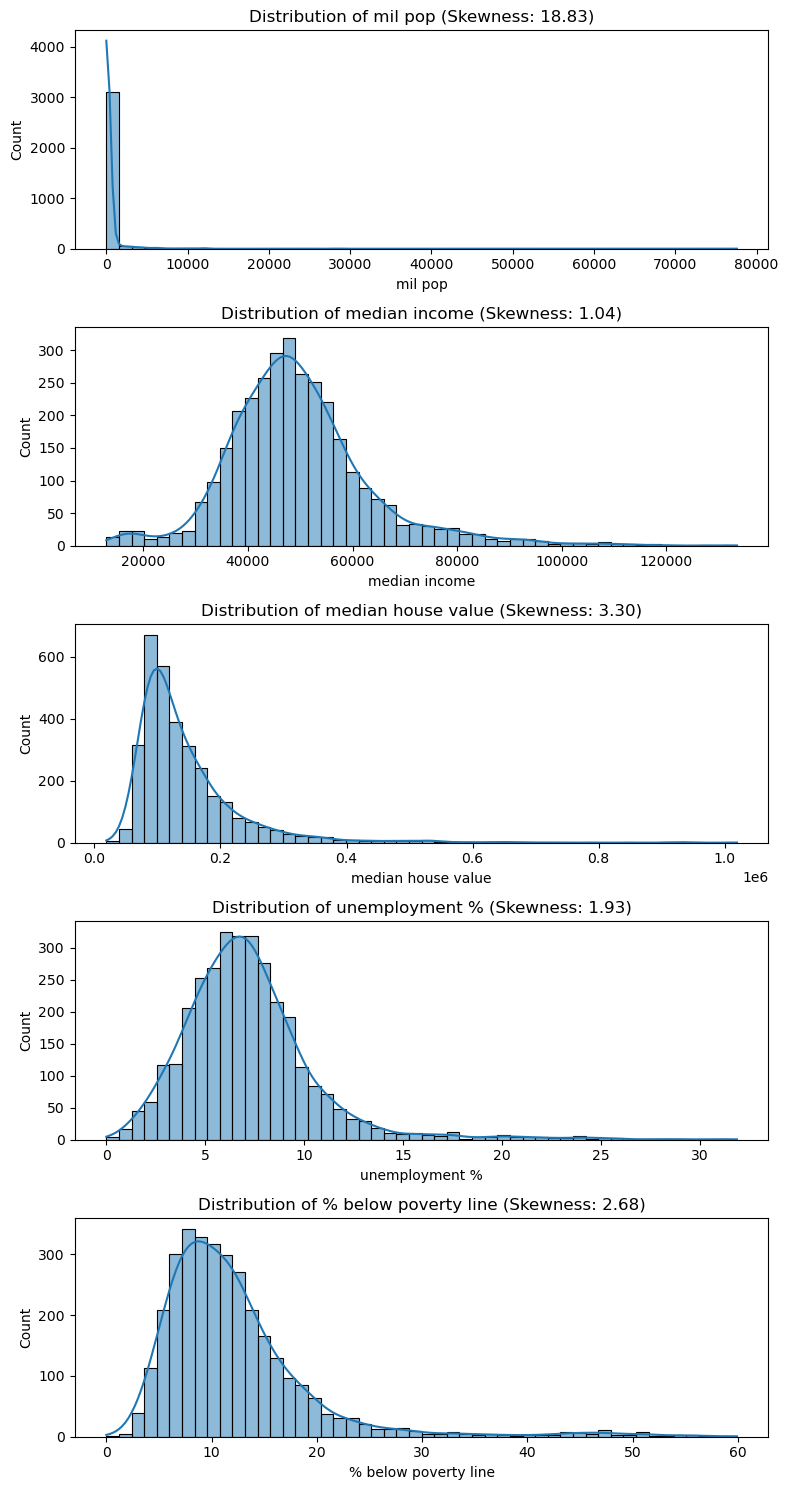

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for analysis
numeric_cols = ["mil pop", "median income", "median house value", "unemployment %", "% below poverty line"]

# Compute skewness for each numeric feature
skewness = df[numeric_cols].skew()

# Plot distributions before transformation
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 15))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} (Skewness: {skewness[col]:.2f})")

plt.tight_layout()
plt.show()




## **Analysis of Distributions and Skewness Values**

### **Military Population (`mil pop`) - Highly Skewed (Skewness: 18.83)**
- The distribution is **heavily right-skewed**, with most counties having very small military populations and a few with significantly high values.
- **Log transformation is necessary** to reduce the extreme skewness and bring the values closer to a normal distribution.

### **Median Income (`median income`) - Slightly Right-Skewed (Skewness: 1.04)**
- The distribution is **approximately normal**, but with a slight right skew.
- **No transformation is required**, as the skewness is minimal and within acceptable limits.

### **Median House Value (`median house value`) - Moderately Skewed (Skewness: 3.30)**
- The data is **right-skewed**, indicating that most counties have lower median house values, while a few have significantly high values.
- **Log transformation is recommended** to reduce the effect of extreme values and improve distribution symmetry.

### **Unemployment Rate (`unemployment %`) - Moderately Skewed (Skewness: 1.93)**
- The distribution is **right-skewed**, with most counties having low unemployment rates but a few with exceptionally high values.
- **Transformation should be considered**, but it should be evaluated after log-scaling the more heavily skewed features.

### **Percentage Below Poverty Line (`% below poverty line`) - Moderately Skewed (Skewness: 2.68)**
- The distribution shows a **right-skew**, with most counties having relatively lower poverty rates and a few outliers with very high values.
- **Log transformation is advisable** to smooth out the extreme values and improve the distribution for further analysis.

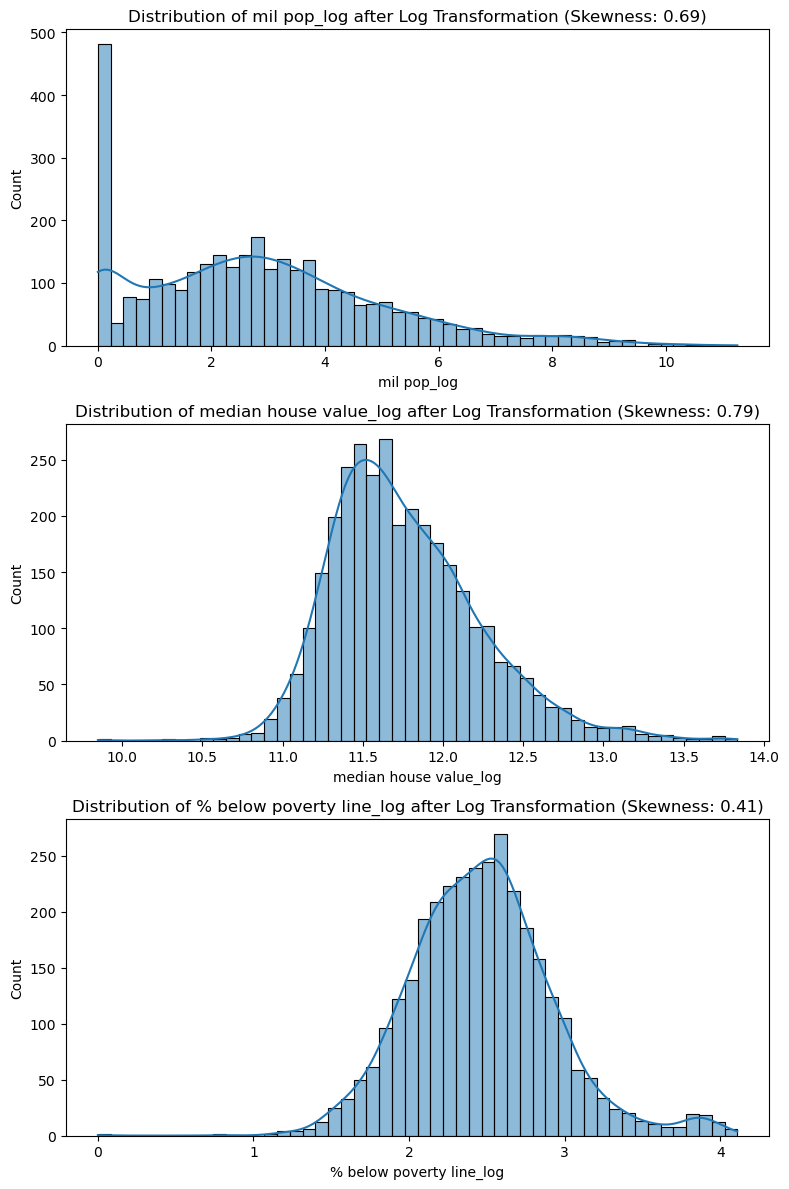

In [30]:
# Apply log transformation to reduce skewness in highly skewed features
df['mil pop_log'] = np.log1p(df['mil pop'])
df['median house value_log'] = np.log1p(df['median house value'])
df['% below poverty line_log'] = np.log1p(df['% below poverty line'])

# Plot distributions after log transformation
log_transformed_cols = ['mil pop_log', 'median house value_log', '% below poverty line_log']
fig, axes = plt.subplots(len(log_transformed_cols), 1, figsize=(8, 12))

for i, col in enumerate(log_transformed_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} after Log Transformation (Skewness: {df[col].skew():.2f})")

plt.tight_layout()
plt.show()

# Display updated skewness values
log_skewness = df[log_transformed_cols].skew().to_frame(name="Skewness After Log Transformation")


In [31]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling (log-transformed where applicable)
features_to_scale = ["mil pop_log", "median income", "median house value_log", "% below poverty line_log", "unemployment %"]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]), columns=features_to_scale)

pd.options.display.float_format = '{:.2f}'.format

In [32]:
df_scaled.describe()

,mil pop_log,median income,median house value_log,% below poverty line_log,unemployment %
count,3235.00,3235.00,3235.00,3235.00,3235.00
mean,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.33,-2.64,-4.15,-5.38,-2.11
25%,-0.78,-0.60,-0.71,-0.66,-0.61
50%,-0.08,-0.11,-0.16,-0.02,-0.10
75%,0.58,0.44,0.59,0.57,0.41
max,3.91,6.04,4.48,3.59,7.27


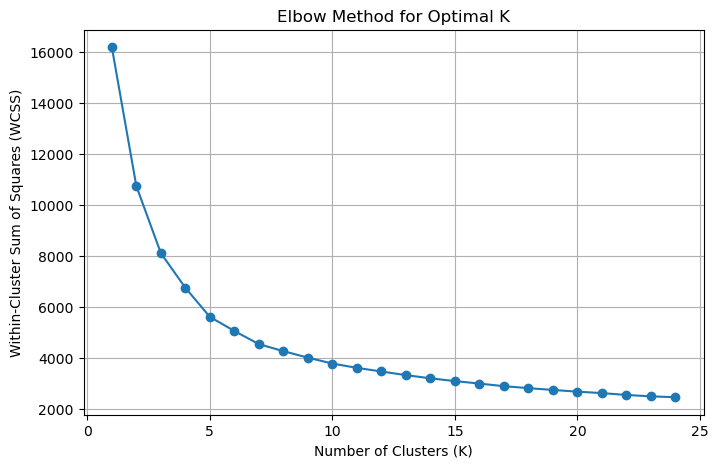

In [33]:
from sklearn.cluster import KMeans
import numpy as np

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

# Trying different values of K (number of clusters)
K_range = range(1, 25)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [34]:
# Preserve the "NAME" column before scaling
df_scaled = df[["NAME"]].copy()  # Keep county names

# Select numerical features for scaling
features_to_scale = ["mil pop_log", "median income", "median house value_log", "% below poverty line_log", "unemployment %"]

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Add scaled features back to df_scaled
df_scaled[features_to_scale] = scaled_features

# Run K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(scaled_features)




In [35]:
df_scaled

,NAME,mil pop_log,median income,median house value_log,% below poverty line_log,unemployment %,Cluster
0,"Abbeville County, South Carolina",-0.09,-0.84,-0.69,0.68,0.70,2
1,"Acadia Parish, Louisiana",-0.37,-0.67,-0.46,0.98,0.51,2
2,"Accomack County, Virginia",0.97,-0.47,0.48,0.24,-0.38,1
3,"Ada County, Idaho",1.85,0.92,1.38,-0.78,-0.46,3
4,"Adair County, Iowa",-1.27,0.10,-0.55,-1.22,-0.94,0
...,...,...,...,...,...,...,...
3230,"Yuma County, Arizona",2.49,-0.37,0.02,0.91,1.16,1
3231,"Yuma County, Colorado",-0.33,-0.14,0.37,-0.54,-1.09,0
3232,"Zapata County, Texas",-1.33,-1.29,-1.49,2.06,0.65,2
3233,"Zavala County, Texas",-0.76,-1.35,-2.15,1.96,0.57,2


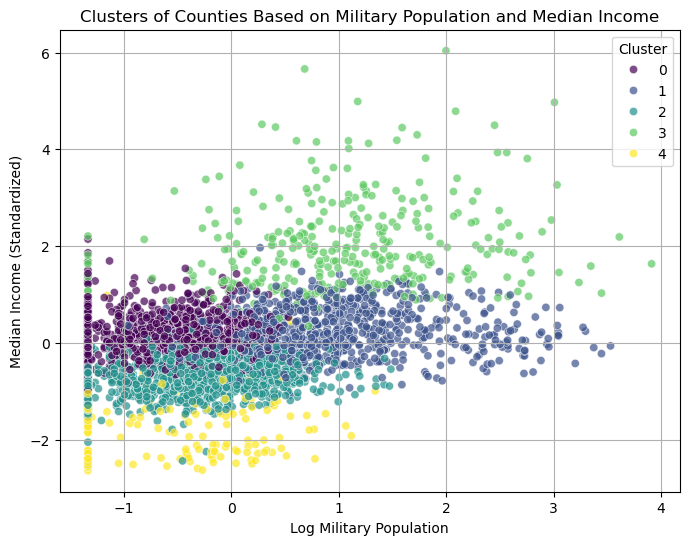

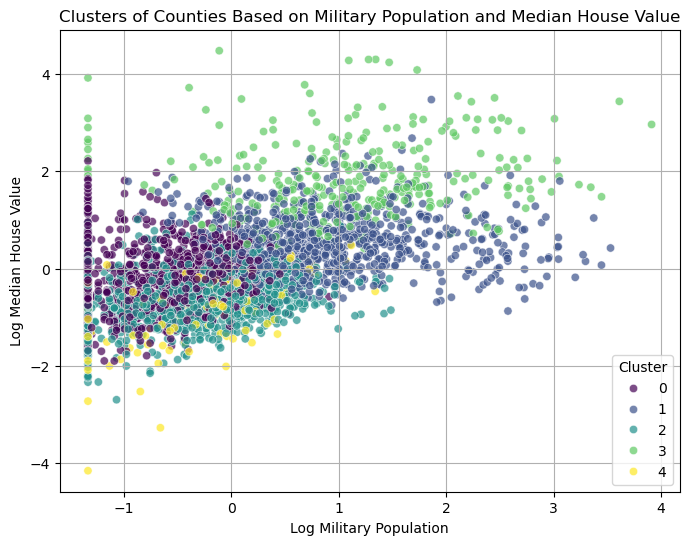

In [36]:
import seaborn as sns

# Scatter plot for Military Population vs. Median Income with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_log"], y=df_scaled["median income"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Log Military Population")
plt.ylabel("Median Income (Standardized)")
plt.title("Clusters of Counties Based on Military Population and Median Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Scatter plot for Military Population vs. Median House Value with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_log"], y=df_scaled["median house value_log"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Log Military Population")
plt.ylabel("Log Median House Value")
plt.title("Clusters of Counties Based on Military Population and Median House Value")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


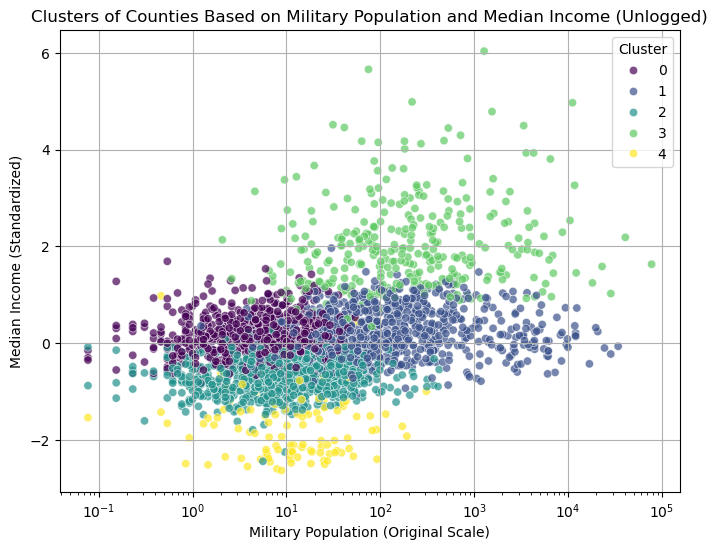

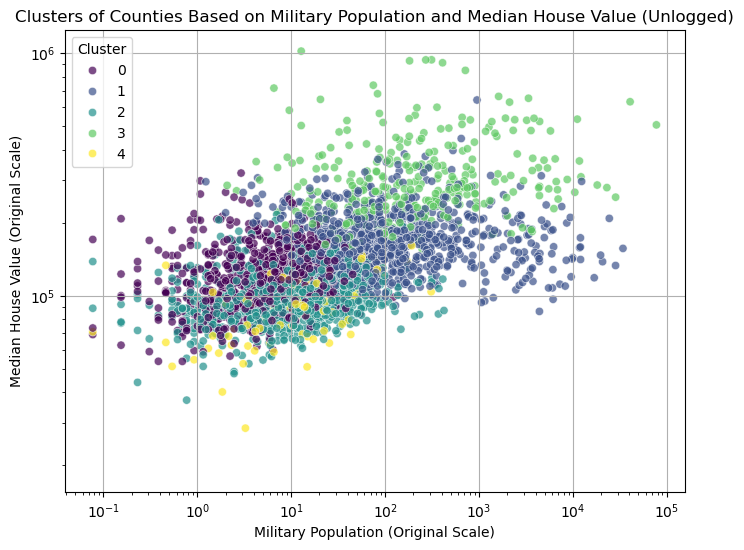

In [37]:
# Recreate the scaled DataFrame with the "NAME" column included
df_scaled = df[["NAME"]].copy()  # Preserve county names

# Select numerical features for scaling
features_to_scale = ["mil pop_log", "median income", "median house value_log", "% below poverty line_log", "unemployment %"]

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_to_scale])

# Add scaled features back to df_scaled
df_scaled[features_to_scale] = scaled_features

# Run K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(scaled_features)

# Reverse log transformation to get original scale values for visualization
df_scaled["mil pop_unlog"] = np.expm1(df["mil pop_log"])
df_scaled["median house value_unlog"] = np.expm1(df["median house value_log"])

# Scatter plot for Military Population vs. Median Income with clusters (Unlogged)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median income"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median Income (Standardized)")
plt.title("Clusters of Counties Based on Military Population and Median Income (Unlogged)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Scatter plot for Military Population vs. Median House Value with clusters (Unlogged)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median house value_unlog"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median House Value (Original Scale)")
plt.title("Clusters of Counties Based on Military Population and Median House Value (Unlogged)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")  # Log scale for better visualization
plt.show()



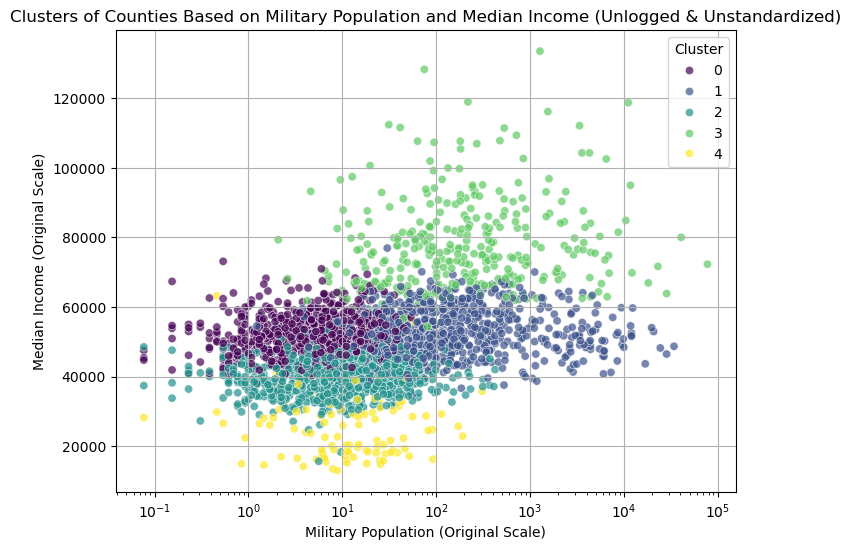

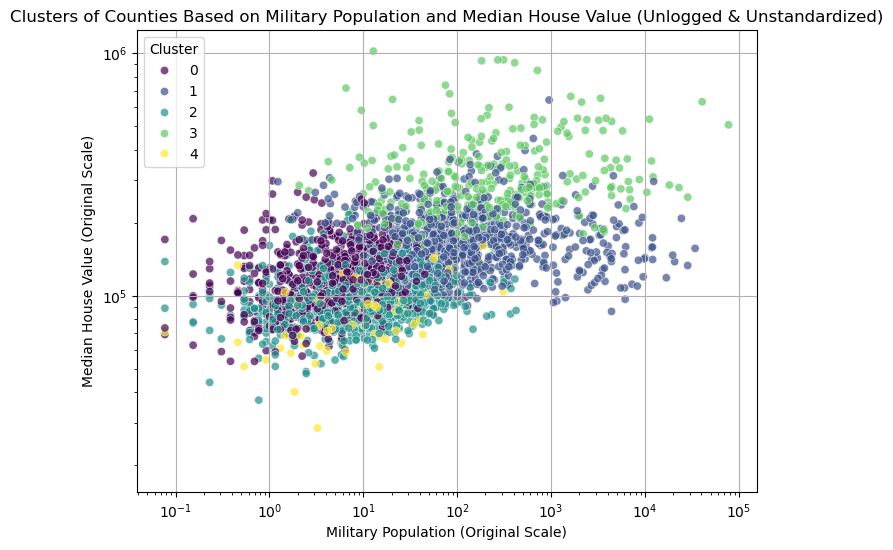

In [39]:
# Reverse standardization for median income using original mean and std from StandardScaler
df_scaled["median income_unscaled"] = (df_scaled["median income"] * scaler.scale_[features_to_scale.index("median income")]) + scaler.mean_[features_to_scale.index("median income")]

# Scatter plot for Military Population vs. Median Income with clusters (Unlogged and Unstandardized)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median income_unscaled"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median Income (Original Scale)")
plt.title("Clusters of Counties Based on Military Population and Median Income (Unlogged & Unstandardized)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.show()

# Scatter plot for Military Population vs. Median House Value with clusters (Unlogged and Unstandardized)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["mil pop_unlog"], y=df_scaled["median house value_unlog"], hue=df_scaled["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Military Population (Original Scale)")
plt.ylabel("Median House Value (Original Scale)")
plt.title("Clusters of Counties Based on Military Population and Median House Value (Unlogged & Unstandardized)")
plt.legend(title="Cluster")
plt.grid(True)
plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")  # Log scale for better visualization
plt.show()




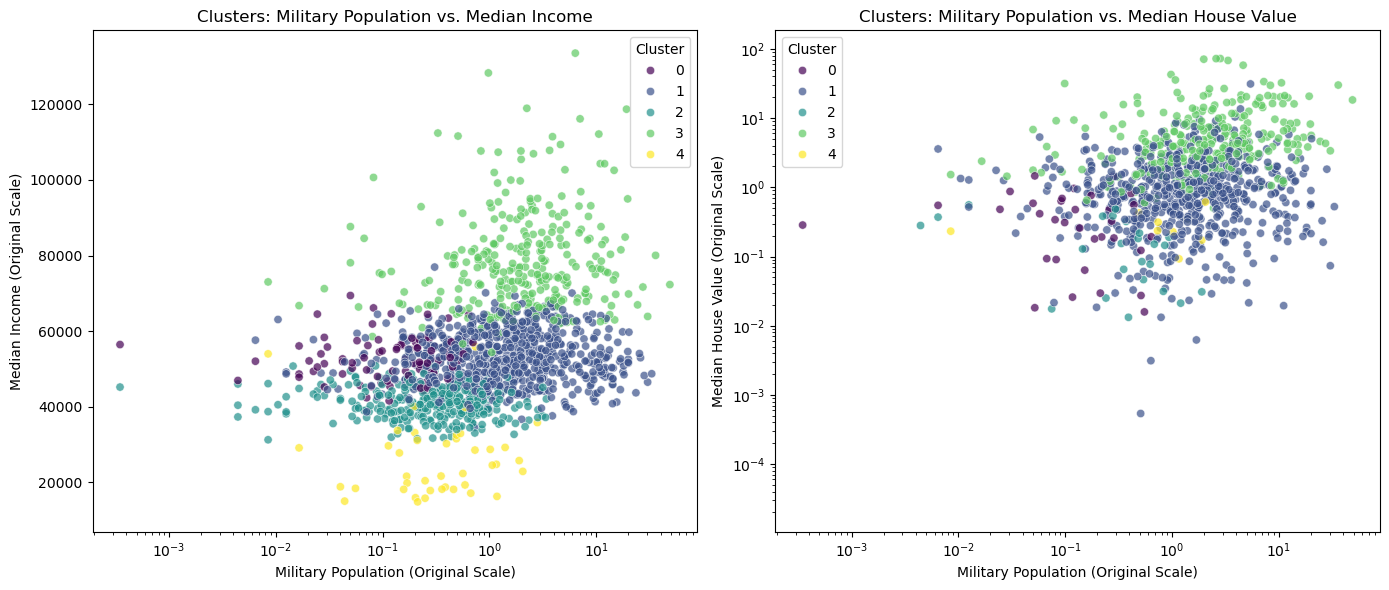

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Unlog and unstandardize features for visualization
df_scaled["mil pop_unlog"] = np.expm1(df_scaled["mil pop_log"])
df_scaled["median house value_unlog"] = np.expm1(df_scaled["median house value_log"])
df_scaled["median income_unscaled"] = (
    df_scaled["median income"] * scaler.scale_[features_to_scale.index("median income")]
) + scaler.mean_[features_to_scale.index("median income")]

# Create scatter plots with cluster boundaries
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Military Population vs. Median Income
sns.scatterplot(
    x=df_scaled["mil pop_unlog"],
    y=df_scaled["median income_unscaled"],
    hue=df_scaled["Cluster"],
    palette="viridis",
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_xlabel("Military Population (Original Scale)")
axes[0].set_ylabel("Median Income (Original Scale)")
axes[0].set_title("Clusters: Military Population vs. Median Income")
axes[0].set_xscale("log")

# Military Population vs. Median House Value
sns.scatterplot(
    x=df_scaled["mil pop_unlog"],
    y=df_scaled["median house value_unlog"],
    hue=df_scaled["Cluster"],
    palette="viridis",
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_xlabel("Military Population (Original Scale)")
axes[1].set_ylabel("Median House Value (Original Scale)")
axes[1].set_title("Clusters: Military Population vs. Median House Value")
axes[1].set_xscale("log")
axes[1].set_yscale("log")

plt.tight_layout()
plt.show()



In [7]:
df

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year,Cluster
0,16.0,(X),50181.0,87.0,498.0,3.8,(X),145300.0,"Jefferson County, Idaho",16,51,Jefferson County,Idaho,2009,0
1,13.0,(X),40322.0,47.0,663.0,4.7,(X),130600.0,"Jerome County, Idaho",16,53,Jerome County,Idaho,2009,0
2,12.0,(X),45446.0,1072.0,6212.0,3.5,(X),213000.0,"Kootenai County, Idaho",16,55,Kootenai County,Idaho,2009,0
3,29.0,(X),36448.0,196.0,1050.0,5.4,(X),173200.0,"Latah County, Idaho",16,57,Latah County,Idaho,2009,0
4,0.0,(X),38750.0,69.0,1136.0,8.5,(X),171400.0,"Lemhi County, Idaho",16,59,Lemhi County,Idaho,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,19.0,16.3,37287.0,23701.0,5108.0,9.2,38.2,115900.0,"Vega Baja Municipio, Puerto Rico",72,145,Vega Baja Municipio,Puerto Rico,2022,0
45085,0.0,13.1,21821.0,17062.0,2462.0,19.6,49.0,114500.0,"Vieques Municipio, Puerto Rico",72,147,Vieques Municipio,Puerto Rico,2022,0
45086,19.0,13.9,33109.0,22461.0,1527.0,0.8,39.4,101900.0,"Villalba Municipio, Puerto Rico",72,149,Villalba Municipio,Puerto Rico,2022,0
45087,31.0,11.1,27239.0,19972.0,2616.0,1.5,44.8,93900.0,"Yabucoa Municipio, Puerto Rico",72,151,Yabucoa Municipio,Puerto Rico,2022,0
